In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.style.use("fivethirtyeight")
%matplotlib inline
pd.set_option('display.max_columns',30)

In [2]:
df=pd.read_csv("kidney_disease.csv")
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [3]:
df.shape

(400, 26)

In [4]:
df.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

In [5]:
df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

ID doesntcontribute much

In [6]:
df.drop('id',axis=1,inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             391 non-null    float64
 1   bp              388 non-null    float64
 2   sg              353 non-null    float64
 3   al              354 non-null    float64
 4   su              351 non-null    float64
 5   rbc             248 non-null    object 
 6   pc              335 non-null    object 
 7   pcc             396 non-null    object 
 8   ba              396 non-null    object 
 9   bgr             356 non-null    float64
 10  bu              381 non-null    float64
 11  sc              383 non-null    float64
 12  sod             313 non-null    float64
 13  pot             312 non-null    float64
 14  hemo            348 non-null    float64
 15  pcv             330 non-null    object 
 16  wc              295 non-null    object 
 17  rc              270 non-null    obj

coerce=ignore null value,
[pcv,rbc,rc,wc] dtype=(obj to numeric)

In [8]:
df['pcv']=pd.to_numeric(df.pcv,errors='coerce')

In [9]:
df['pcv']

0      44.0
1      38.0
2      31.0
3      32.0
4      35.0
       ... 
395    47.0
396    54.0
397    49.0
398    51.0
399    53.0
Name: pcv, Length: 400, dtype: float64

In [10]:
df['wc']=pd.to_numeric(df['wc'],errors='coerce')

In [11]:
df['wc']

0      7800.0
1      6000.0
2      7500.0
3      6700.0
4      7300.0
        ...  
395    6700.0
396    7800.0
397    6600.0
398    7200.0
399    6800.0
Name: wc, Length: 400, dtype: float64

In [12]:
df['rbc']=pd.to_numeric(df['rbc'],errors='coerce')

In [13]:
df['rc']=pd.to_numeric(df['rc'],errors='coerce')

categorical_columns

In [14]:
ct_col=[col for col in df.columns if df[col].dtype=='object']
ct_col

['pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'classification']

numerical colmns

In [15]:
nm_col=[col for col in df.columns if df[col].dtype!='object']
nm_col

['age',
 'bp',
 'sg',
 'al',
 'su',
 'rbc',
 'bgr',
 'bu',
 'sc',
 'sod',
 'pot',
 'hemo',
 'pcv',
 'wc',
 'rc']

All unique values of cols in ct_columns

In [16]:
for col in ct_col:
    print(f"{col} has {df[col].unique()} values\n")

pc has ['normal' 'abnormal' nan] values

pcc has ['notpresent' 'present' nan] values

ba has ['notpresent' 'present' nan] values

htn has ['yes' 'no' nan] values

dm has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values

cad has ['no' 'yes' '\tno' nan] values

appet has ['good' 'poor' nan] values

pe has ['no' 'yes' nan] values

ane has ['no' 'yes' nan] values

classification has ['ckd' 'ckd\t' 'notckd'] values



In [17]:
df['dm'].replace(to_replace={'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)

In [18]:
df['dm'].unique()

array(['yes', 'no', nan], dtype=object)

In [19]:
df['cad']=df['cad'].replace(to_replace='\tno',value='no')
df['cad']

0      no
1      no
2      no
3      no
4      no
       ..
395    no
396    no
397    no
398    no
399    no
Name: cad, Length: 400, dtype: object

In [20]:
df['classification']=df['classification'].replace(to_replace={'ckd\t':'ckd','notckd':'no ckd'})
df['classification']

0         ckd
1         ckd
2         ckd
3         ckd
4         ckd
        ...  
395    no ckd
396    no ckd
397    no ckd
398    no ckd
399    no ckd
Name: classification, Length: 400, dtype: object

In [21]:
df['classification'].unique()

array(['ckd', 'no ckd'], dtype=object)

In [22]:
df['classification']=df['classification'].map({'ckd':0,'no ckd':1})
df['classification']

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    1
399    1
Name: classification, Length: 400, dtype: int64

univariate analysis

In [23]:
df['age']=df['age'].dropna()

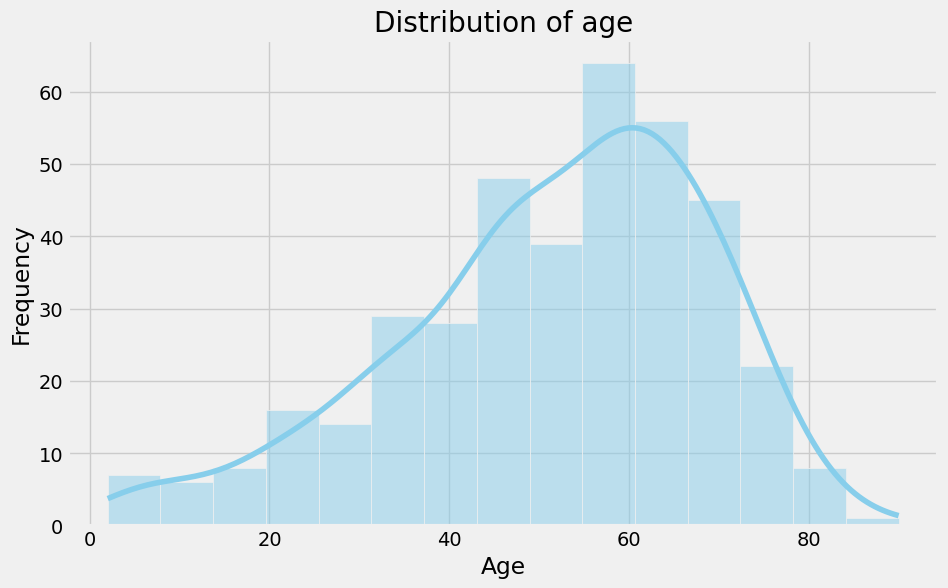

In [24]:
plt.figure(figsize=(10,6))
sns.histplot(df['age'],kde=True,color='skyblue')
plt.title('Distribution of age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

#insights=mean age is around 50,most of people are in 40-60

In [25]:
df.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

how many people have cronic disease has hupertension

In [26]:
df.htn

0      yes
1       no
2       no
3      yes
4       no
      ... 
395     no
396     no
397     no
398     no
399     no
Name: htn, Length: 400, dtype: object

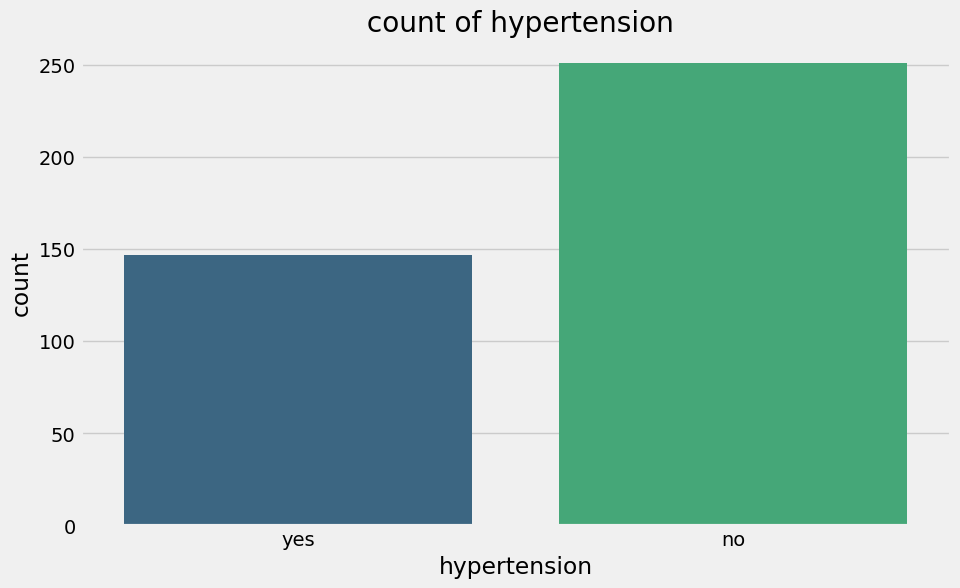

In [27]:
plt.figure(figsize=(10,6))
sns.countplot(x=df['htn'],data=df,palette='viridis')
plt.title(' count of hypertension')
plt.xlabel('hypertension')
plt.ylabel('count')
plt.show()

#insight=150 people have hypertension

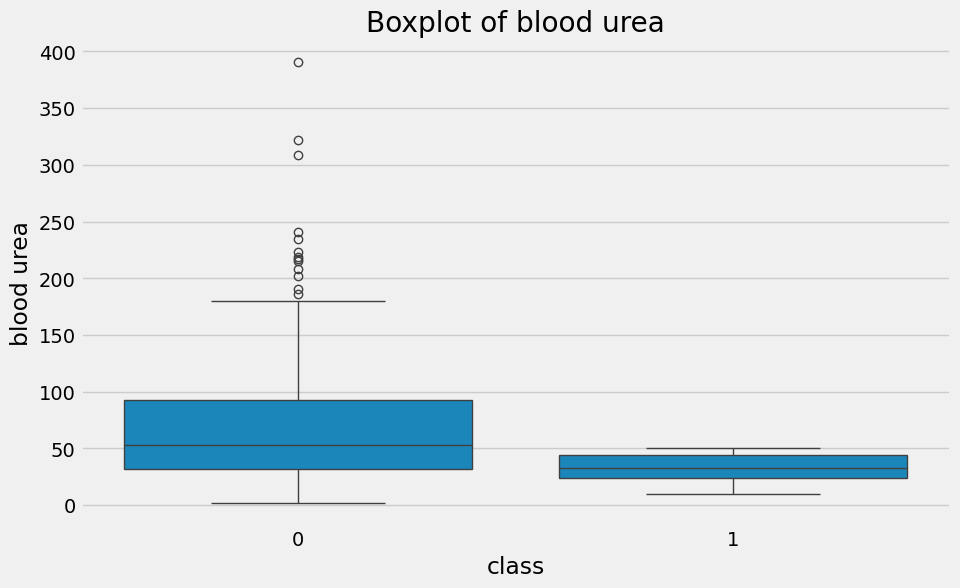

In [28]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df['classification'],y=df['bu'],data=df)
plt.xlabel('class')
plt.ylabel('blood urea')
plt.title('Boxplot of blood urea')
plt.show()

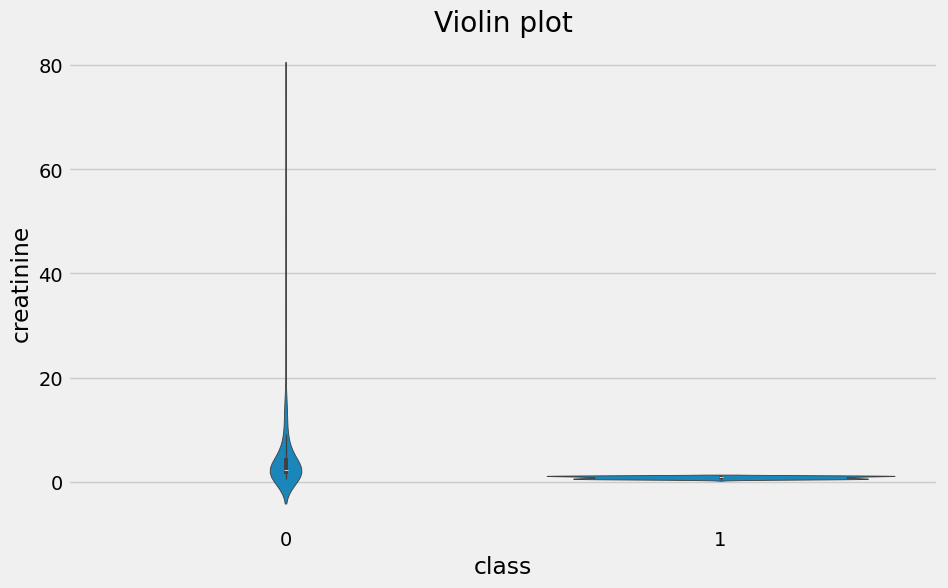

In [29]:
plt.figure(figsize=(10,6))
sns.violinplot(x=df['classification'],y=df['sc'],data=df)
plt.title('Violin plot')
plt.xlabel('class')
plt.ylabel('creatinine')
plt.show()

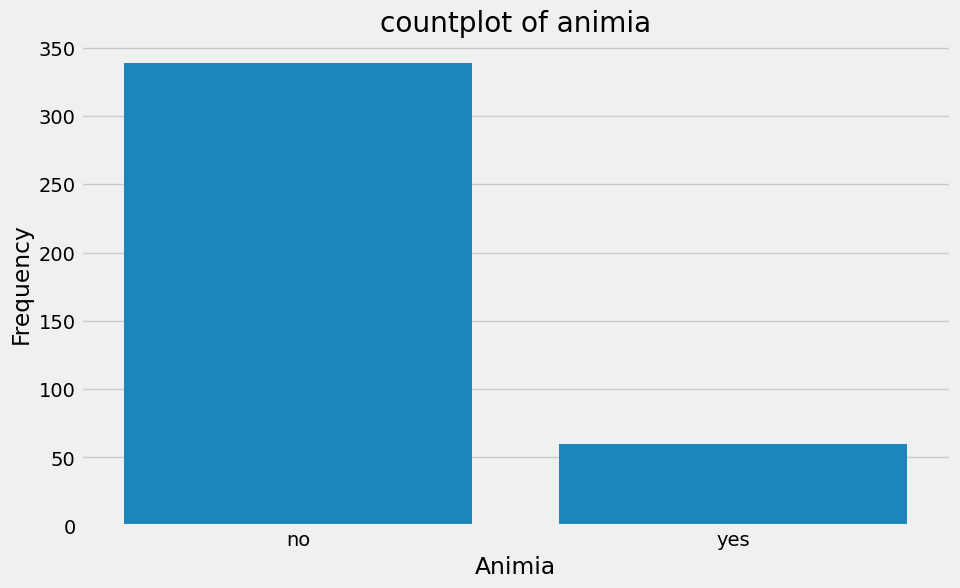

In [30]:
plt.figure(figsize=(10,6))
sns.countplot(x=df['ane'],data=df)
plt.title('countplot of animia')
plt.xlabel('Animia')
plt.ylabel('Frequency')
plt.show()

In [31]:
df.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [32]:
df.appet

0      good
1      good
2      poor
3      poor
4      good
       ... 
395    good
396    good
397    good
398    good
399    good
Name: appet, Length: 400, dtype: object

In [33]:
df['appet'].unique()

array(['good', 'poor', nan], dtype=object)

<Axes: ylabel='count'>

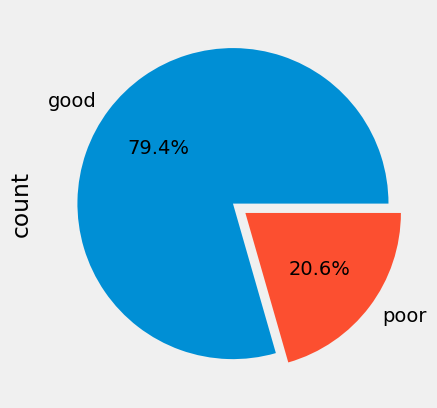

In [34]:
df['appet'].value_counts().plot.pie(autopct='%1.1f%%',explode=(0,0.1))

<Axes: ylabel='count'>

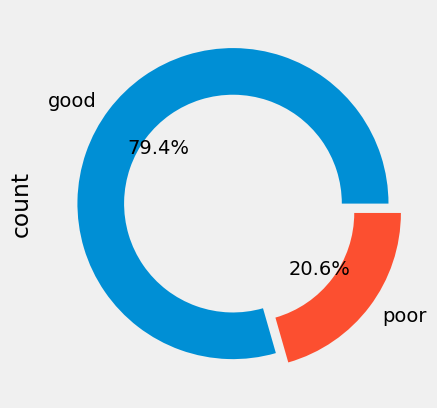

In [35]:
df['appet'].value_counts().plot.pie(autopct='%1.1f%%',explode=(0,0.1),wedgeprops=dict(width=0.3))

if we want analysis-how many ppl having cronic hypertension withpoor appet (HW)

<Axes: xlabel='pe', ylabel='count'>

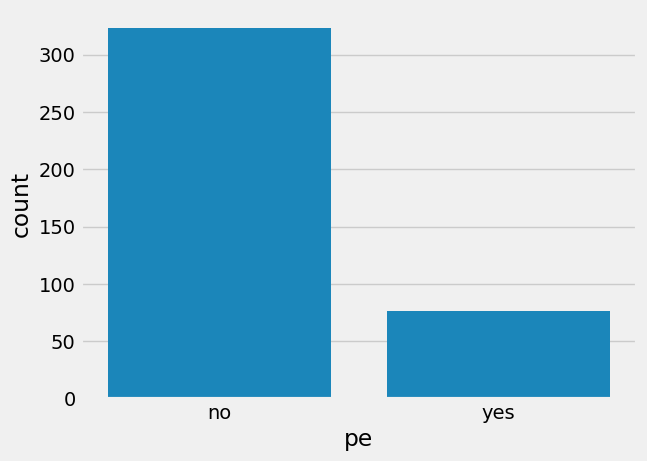

In [36]:
sns.countplot(x=df['pe'],data=df)

univarite analysis

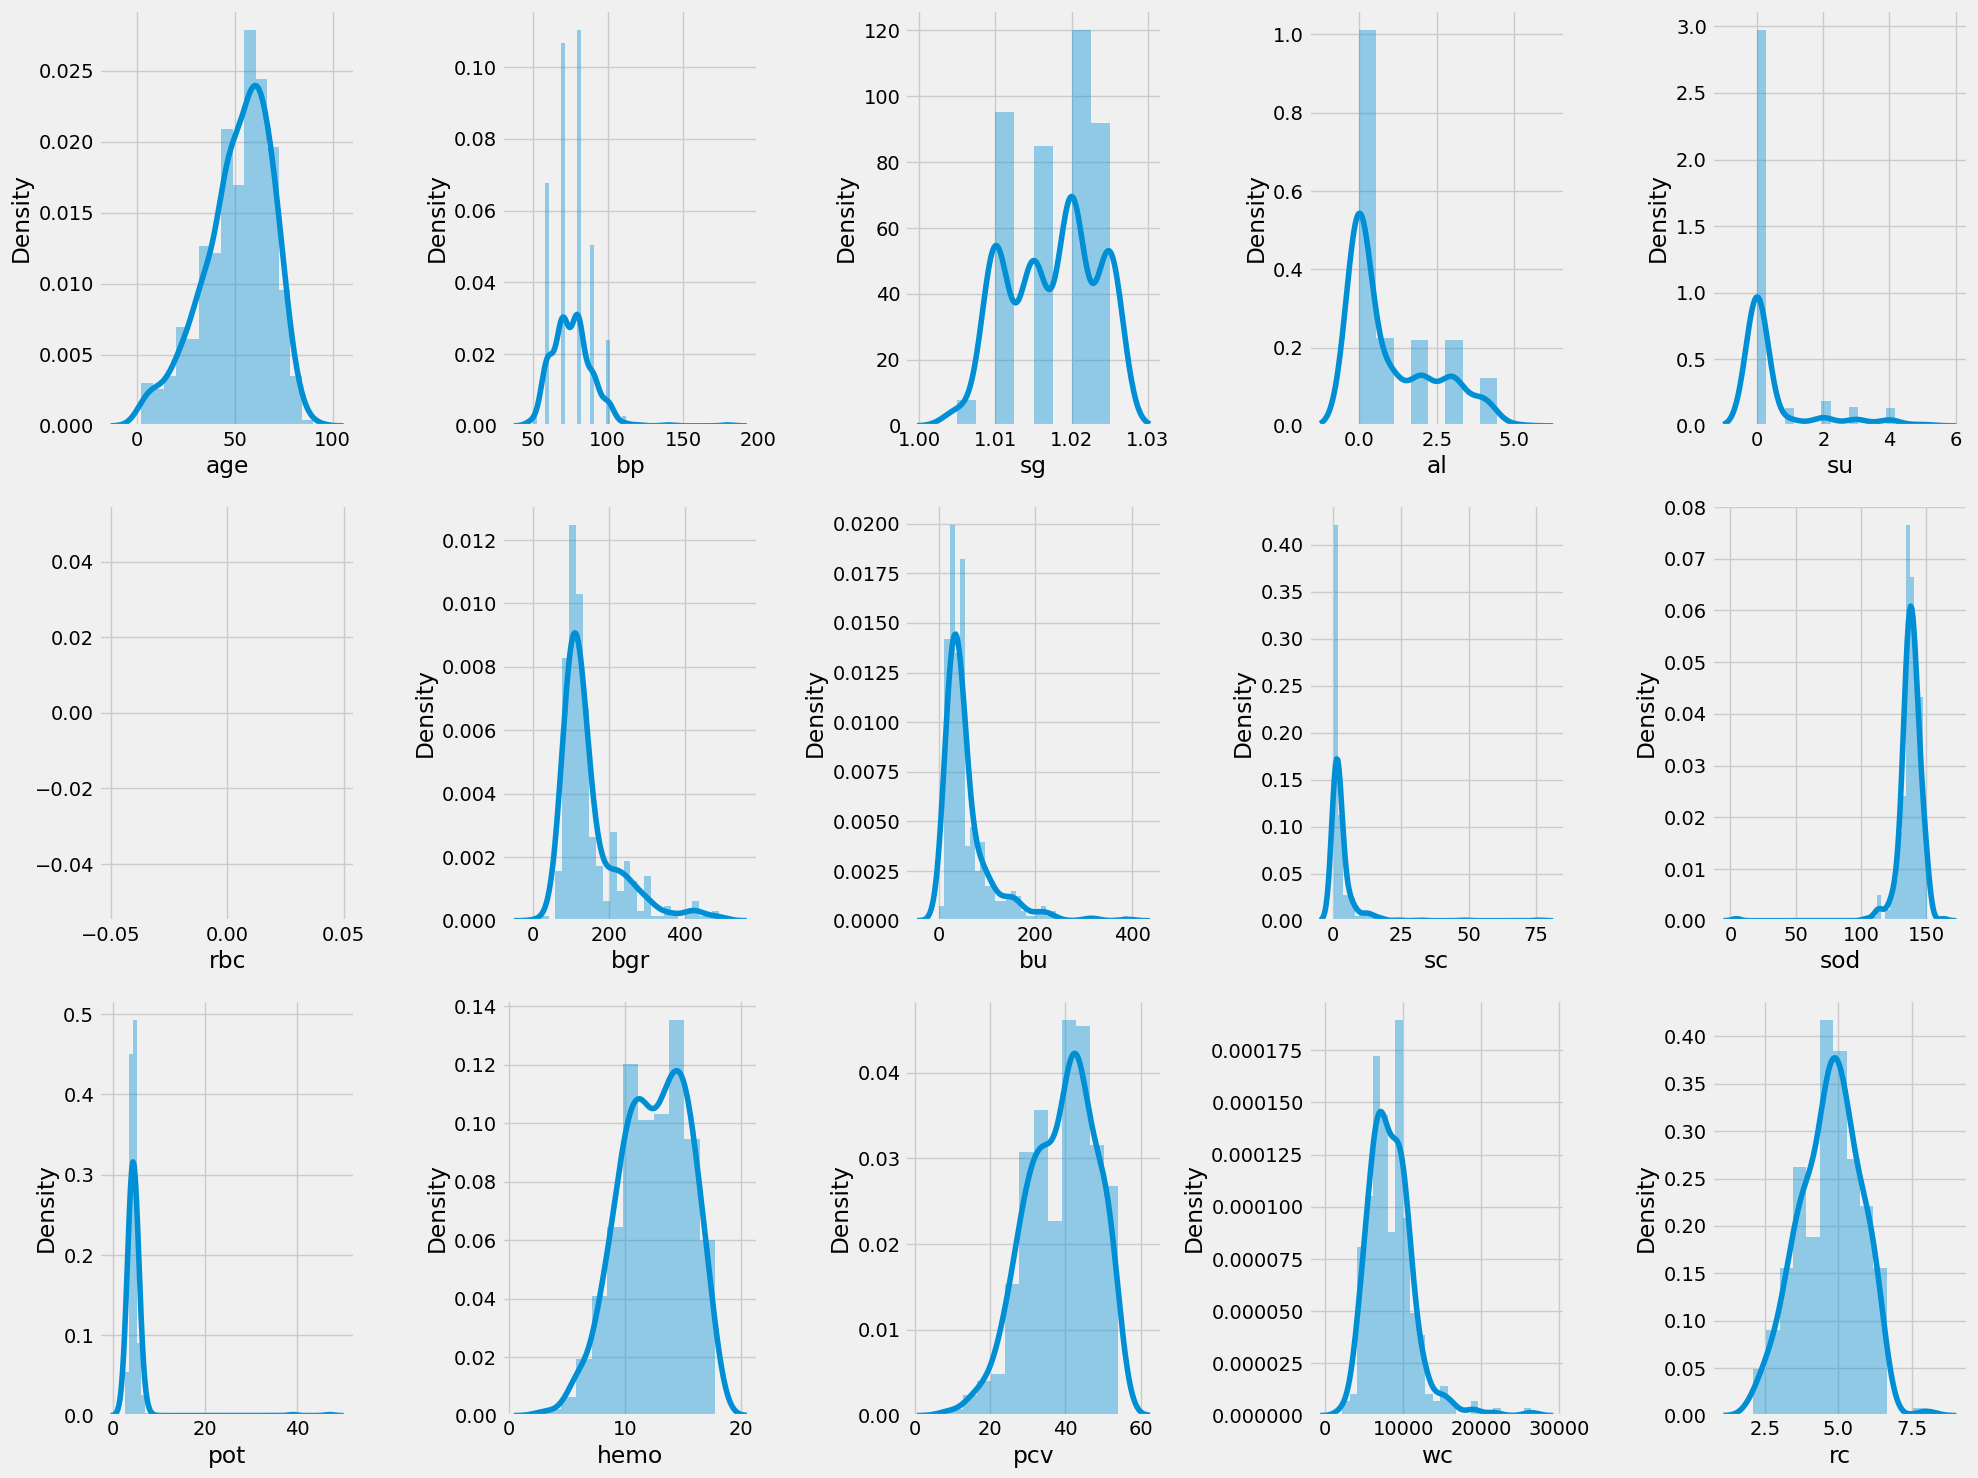

In [37]:
plt.figure(figsize=(20,15))
plotnumber=1

for col in nm_col:
    if plotnumber<=15:
        ax=plt.subplot(3,5,plotnumber)
        sns.distplot(df[col])
        plt.xlabel(col)
    plotnumber+=1

plt.tight_layout()
plt.show()

In [38]:
def kde(col):
    grid=sns.FacetGrid(df,hue='classification',height=6,aspect=2)
    grid.map(sns.kdeplot,col)
    grid.add_legend()

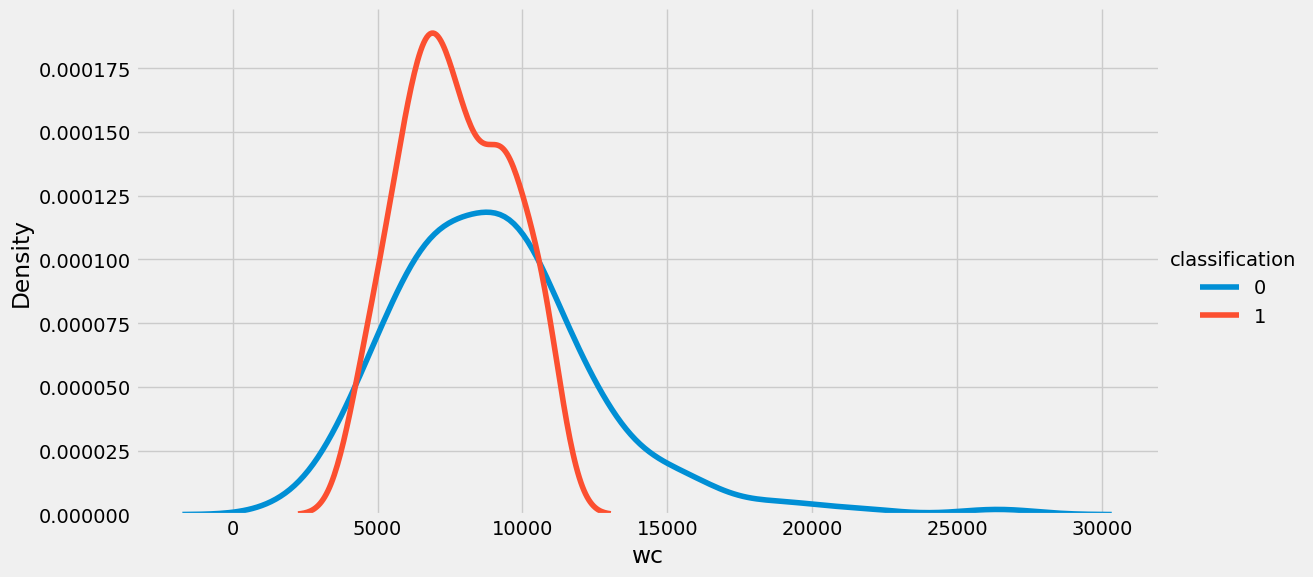

In [39]:
kde('wc')

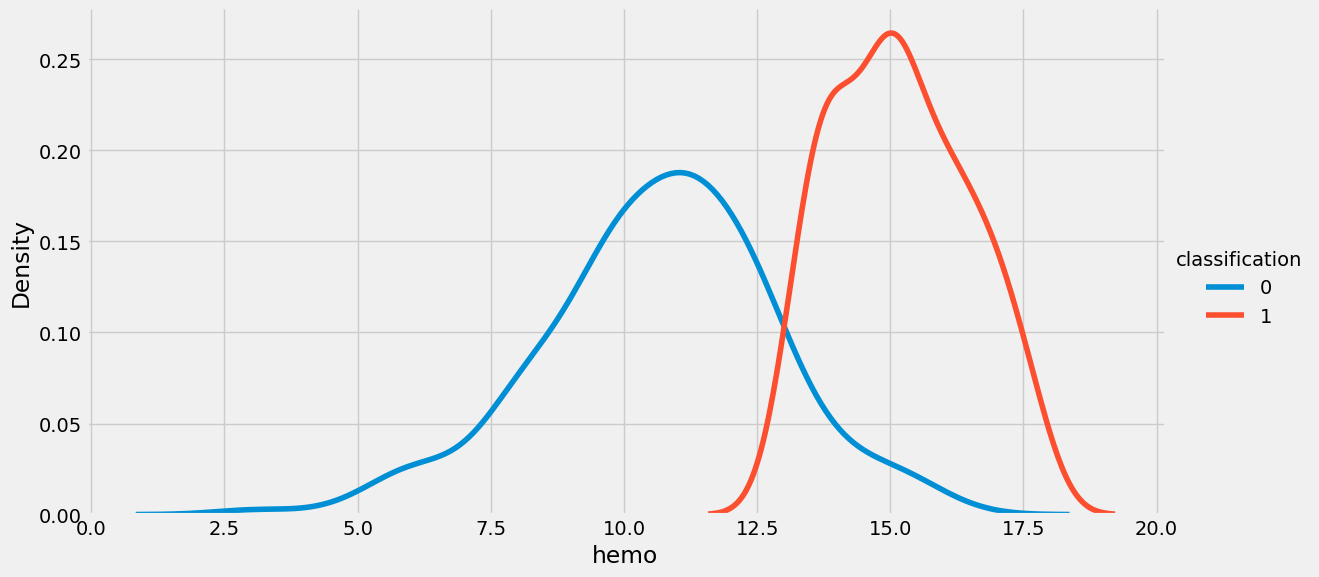

In [40]:
kde('hemo')

In [41]:
def  violin(col):
    fig=px.violin(df,y=col,x='classification',box=True,template='plotly_dark')
    return fig.show()

In [42]:
violin('hemo')

In [43]:
violin('pcv')

In [44]:
violin('sg')

baivarite analysis

<Axes: xlabel='age', ylabel='bp'>

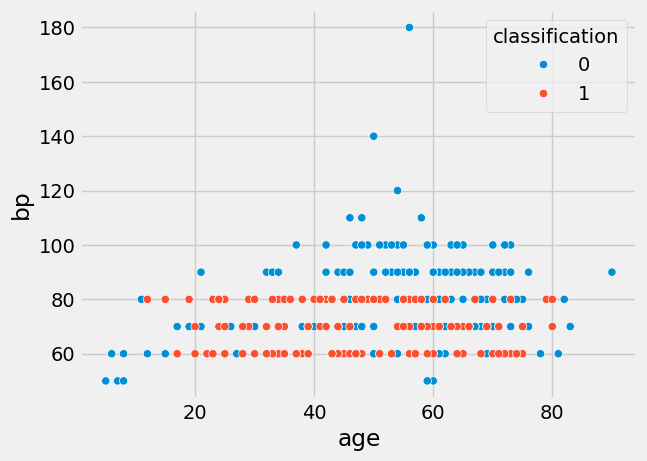

In [46]:
sns.scatterplot(x='age',y='bp',data=df,hue='classification')
#age ,bp wrt clasification

In [48]:
df.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [49]:
diabetes_hypertension=pd.crosstab(df['dm'],df['htn'])
diabetes_hypertension

htn,no,yes
dm,,
no,220,41
yes,31,106


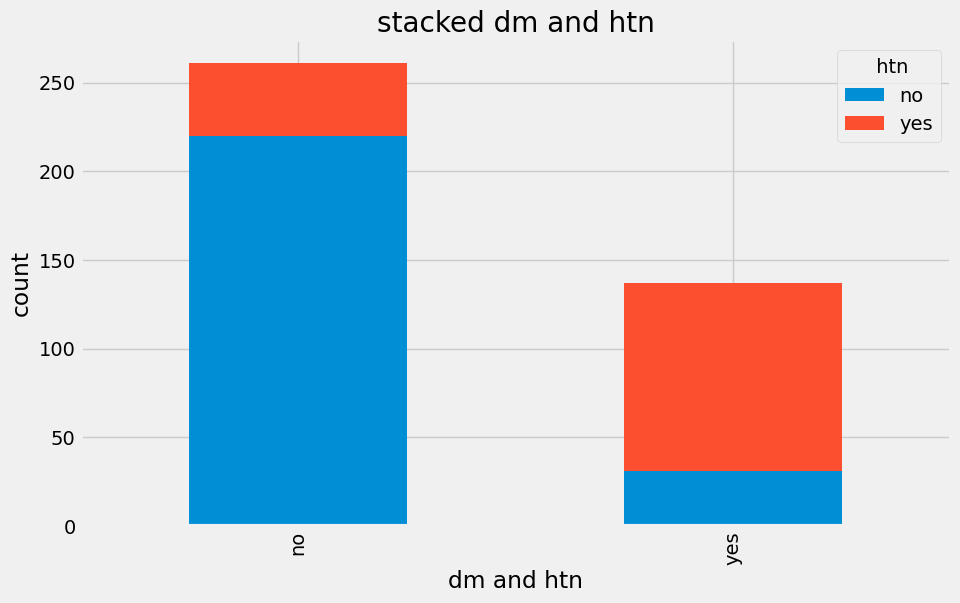

In [52]:
diabetes_hypertension.plot(kind='bar',stacked=True,figsize=(10,6))
plt.xlabel('dm and htn')
plt.ylabel('count')
plt.legend(title=' htn')
plt.title('stacked dm and htn')
plt.show()

In [57]:
def scatter(col1,col2):
    fig=px.scatter(df,x=col1,y=col2,color='classification',template='plotly_dark')
    return fig.show()

In [58]:
scatter('hemo','pcv')

multivarite analysis

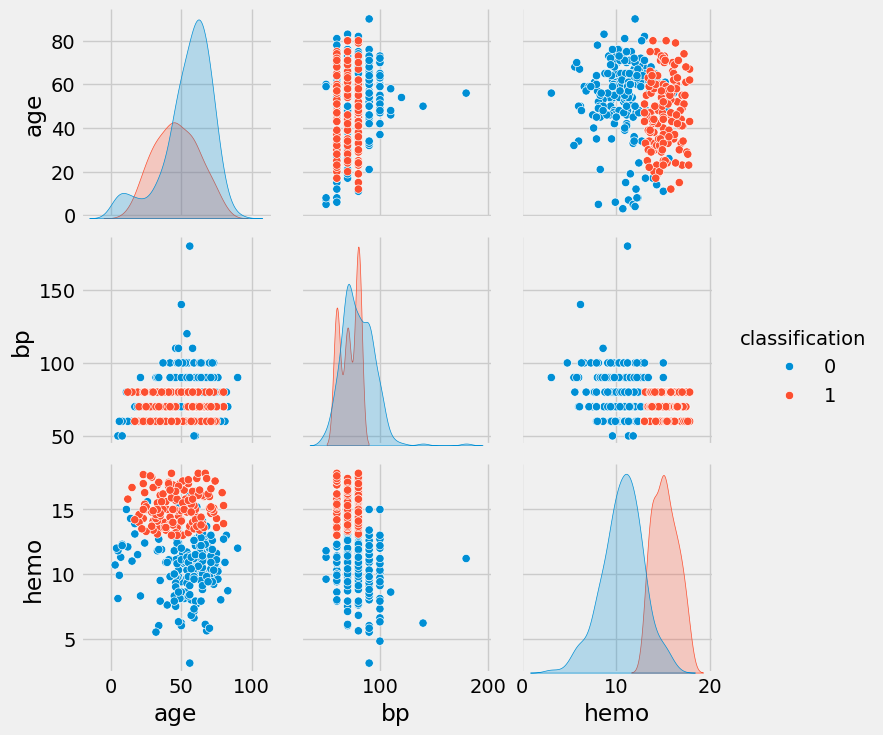

In [60]:
selected_columns=['age','bp','hemo','classification']
sns.pairplot(df[selected_columns],hue='classification')

correleation

<Axes: >

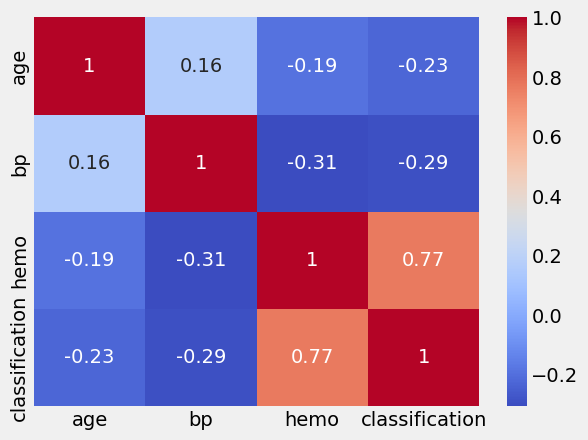

In [62]:
df[selected_columns].corr()
sns.heatmap(df[selected_columns].corr(),annot=True,cmap='coolwarm')

In [65]:
import plotly.graph_objects as go
heatmap=df[selected_columns].corr()
fig=go.Figure(data=go.Heatmap(z=heatmap.values,x=heatmap.columns,y=heatmap.index,colorscale='Viridis'))
fig.update_layout(title='Interactive Heatmap of Correlation Matrix')
fig.show()

In [66]:
fig=px.scatter_3d(df,x='age',y='bp',z='sc',color='hemo',title='3D scatter plot with color gradient')
fig.show()